| **Chapter**                   | 3:  Host factors                           |
| ----------------------------- |--------------------------------------------|
| **Computational Note**        | 3.5: Computational subcompartmental models |
| **Package prerequisites**     | None                                       |


# Computational subcompartmental models

\begin{equation}
\frac{dS}{dt} = - \beta S \sum_{i = 1}^n I_i
\end{equation}

\begin{equation}
\frac{dI_1}{dt} = \beta S \sum_{i = 1}^n I_i - \gamma n I_i
\end{equation}

\begin{equation}
\frac{dI_i}{dt} = \gamma n I_{i - 1} - \gamma n I_i
\end{equation}

\begin{equation}
\frac{dR}{dt} = \sum_{i = 1}^n \gamma n I_i
\end{equation}

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [1]:
%load_ext watermark
%watermark --iversions -v -a "Chris von Csefalvay" -gu "chrisvoncsefalvay"

Author: Chris von Csefalvay

Github username: chrisvoncsefalvay

Python implementation: CPython
Python version       : 3.10.2
IPython version      : 8.4.0



In [2]:
S_0 = 1
I_0_0 = 1e-2
R_0 = 0.0


beta = 3
tau = 6
gamma = 1/tau

In [3]:
I_0 = [0.0 for i in range(0, 4)]
I_0[0] = I_0_0
y_0 = [S_0, *I_0, R_0]

In [4]:
def deriv(t, y, beta, gamma, n):
    S = y[0]
    I = y[1:-1]
    R = y[-1]

    dSdt = - beta * S * sum(I)

    dIdt = [0.0 for i in range(0, len(I))]
    dIdt[0] = beta * S * sum(I) - gamma * n * I[0]
    
    for i in range(1, n):
        dIdt[i] = gamma * n * I[i - 1] - gamma * n * I[i]

    dRdt = gamma * n * sum(dIdt)

    return dSdt, *dIdt, dRdt

In [5]:
def solve_for_n(beta, gamma, n, I_0_0 = 0.1, **kwargs):
    I_0 = [0.0 for i in range(0, n)]
    I_0[0] = I_0_0
    S_0 = 1 - I_0_0
    R_0 = 0

    y_0 = [S_0, *I_0, R_0]

    res = solve_ivp(fun=deriv, y0=y_0, args=(beta, gamma, n), **kwargs)
    
    return {"t": res.t,
            "S": res.y[0],
            "I": np.array(res.y[1:-1]).sum(axis=0),
            "R": res.y[-1]}

In [6]:
n2 = solve_for_n(beta, gamma, 2, t_span=(0, 60), max_step=0.5, method="BDF")
n3 = solve_for_n(beta, gamma, 3, t_span=(0, 60), max_step=0.5, method="BDF")
n4 = solve_for_n(beta, gamma, 4, t_span=(0, 60), max_step=0.5, method="BDF")
n10 = solve_for_n(beta, gamma, 10, t_span=(0, 60), max_step=0.5, method="BDF") 
n15 = solve_for_n(beta, gamma, 15, t_span=(0, 60), max_step=0.5, method="BDF")
n20 = solve_for_n(beta, gamma, 20, t_span=(0, 60), max_step=0.5, method="BDF")
n30 = solve_for_n(beta, gamma, 30, t_span=(0, 60), max_step=0.5, method="BDF")
n40 =solve_for_n(beta, gamma, 40, t_span=(0, 60), max_step=0.5, method="BDF")

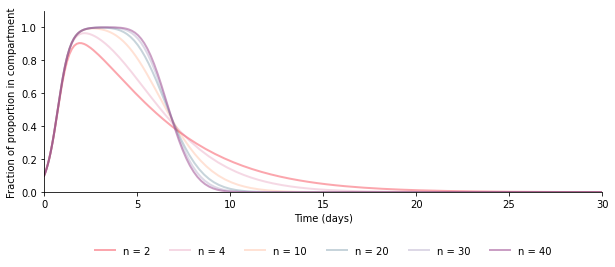

In [7]:

fig = plt.figure(facecolor="w", figsize=(10, 4))
ax = fig.add_subplot(111, axisbelow=True)


ax.plot(n2["t"], n2["I"], color=COLORS["I"], alpha=0.55, lw=2, label="n = 2", linestyle="solid")
ax.plot(n4["t"], n4["I"], color=COLORS["Y"], alpha=0.22, lw=2, label="n = 4", linestyle="solid")
ax.plot(n10["t"], n10["I"], color=COLORS["C"], alpha=0.22, lw=2, label="n = 10", linestyle="solid")
ax.plot(n20["t"], n20["I"], color=COLORS["D"], alpha=0.22, lw=2, label="n = 20", linestyle="solid")
ax.plot(n30["t"], n30["I"], color=COLORS["X"], alpha=0.22, lw=2, label="n = 30", linestyle="solid")
ax.plot(n40["t"], n40["I"], color=COLORS["R"], alpha=0.55, lw=2, label="n = 40", linestyle="solid")


ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")
ax.set_xlim(0, 30)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.4), loc="lower center", ncol=6, frameon=False)

fig.subplots_adjust(bottom=0.25)

ax.set_ylim(0, 1.1)

plt.savefig("by_n_values.pdf", dpi=600)
plt.show()